In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych//OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [3]:
images.shape

(10000, 512, 512, 1)

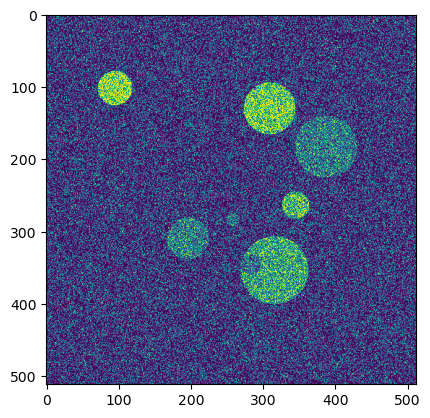

In [4]:
imshow(images[1001])

In [5]:
masks.shape

(10000, 512, 512, 1)

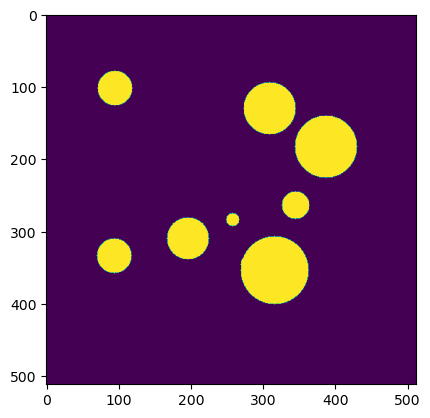

In [6]:
imshow(masks[1001])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [11]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpk6huw599kuc_unet2d


In [12]:
hist = C.train(images[0:8000], masks[0:8000], images[8000:10000], masks[8000:10000], batch_size=16, patience_counter=4)

Epoch 1/100
500/500 [==============================] - 147s 272ms/step - loss: 6.9612 - dice_coeff: 0.7526 - val_loss: 0.0825 - val_dice_coeff: 0.7802
Epoch 2/100
500/500 [==============================] - 135s 270ms/step - loss: 0.4266 - dice_coeff: 0.8243 - val_loss: 0.0672 - val_dice_coeff: 0.8360
Epoch 3/100
500/500 [==============================] - 135s 270ms/step - loss: 0.0609 - dice_coeff: 0.8549 - val_loss: 0.0593 - val_dice_coeff: 0.8473
Epoch 4/100
500/500 [==============================] - 135s 270ms/step - loss: 0.0561 - dice_coeff: 0.8680 - val_loss: 0.0559 - val_dice_coeff: 0.8771
Epoch 5/100
500/500 [==============================] - 135s 270ms/step - loss: 0.0539 - dice_coeff: 0.8752 - val_loss: 0.0535 - val_dice_coeff: 0.8666
Epoch 6/100
500/500 [==============================] - 135s 270ms/step - loss: 0.3574 - dice_coeff: 0.6984 - val_loss: 0.0757 - val_dice_coeff: 0.8292
Epoch 7/100
500/500 [==============================] - 135s 271ms/step - loss: 0.0683 - dice_c

In [13]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

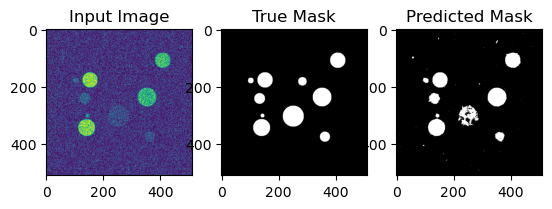

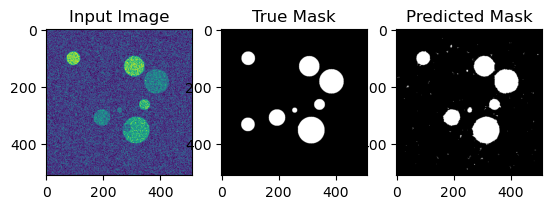

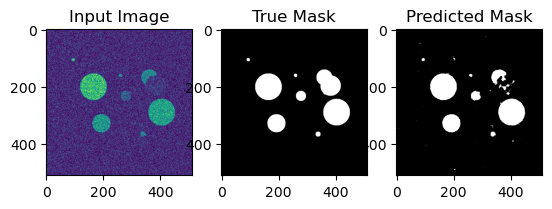

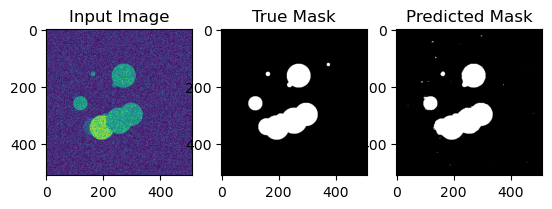

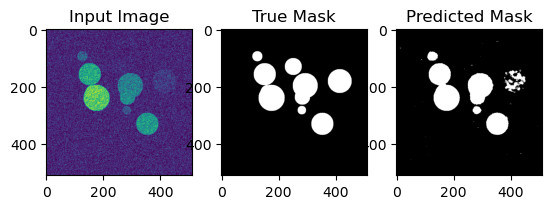

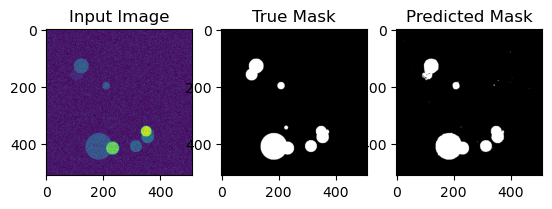

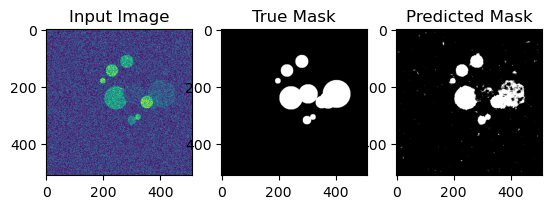

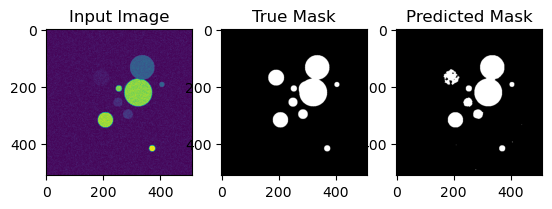

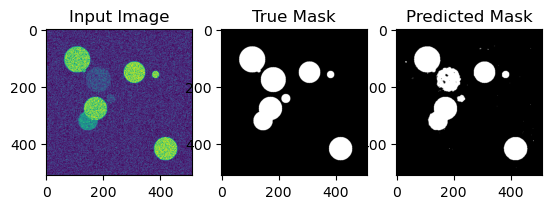

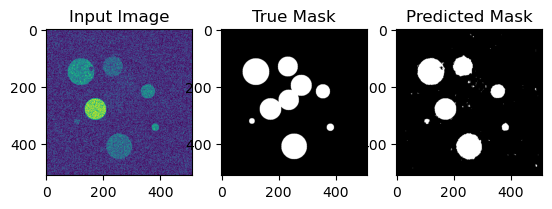

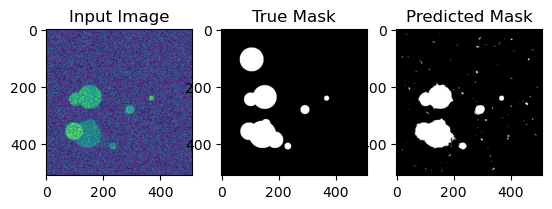

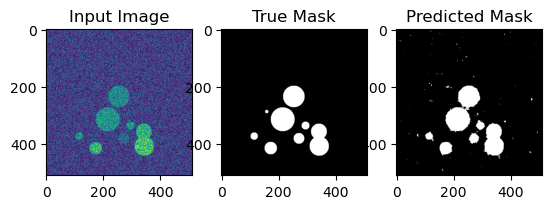

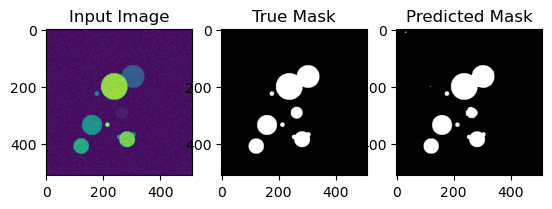

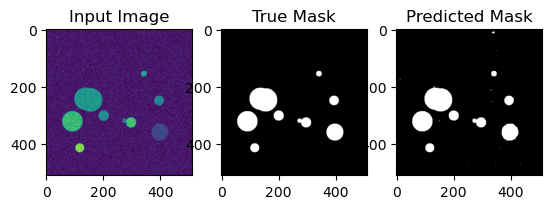

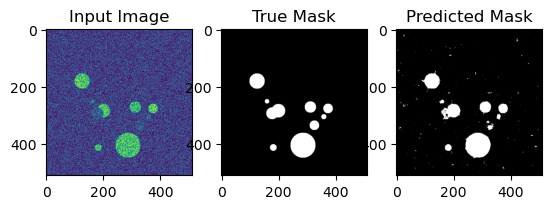

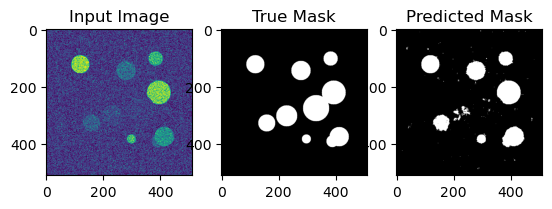

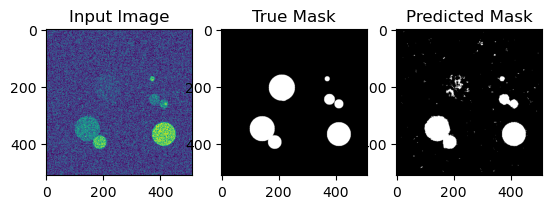

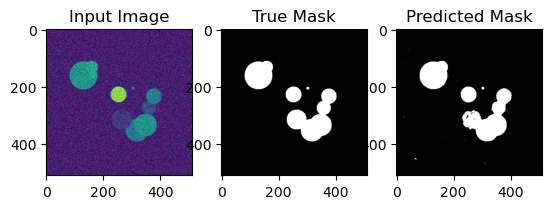

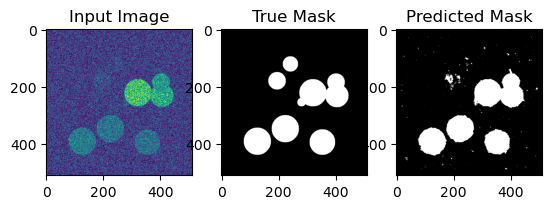

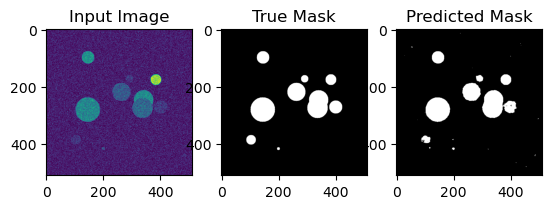

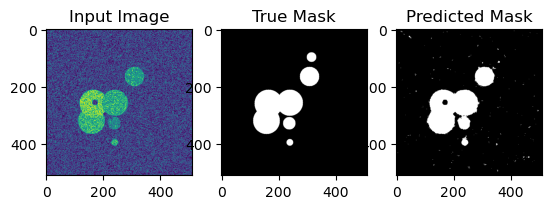

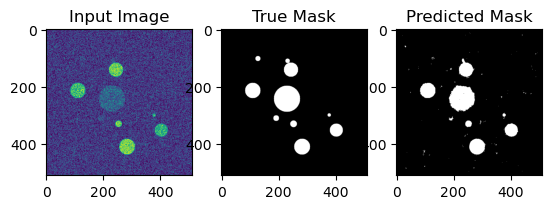

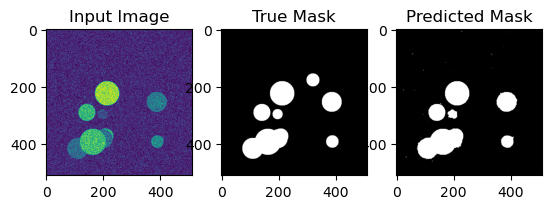

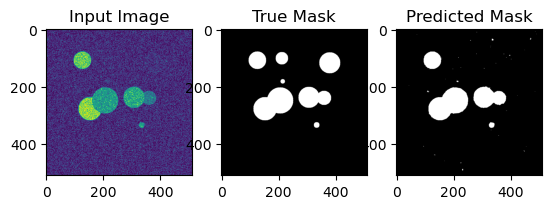

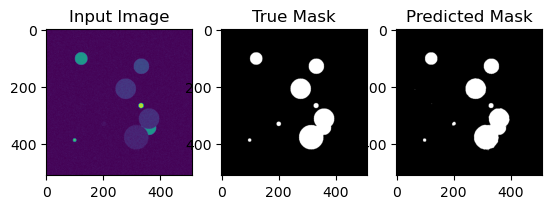

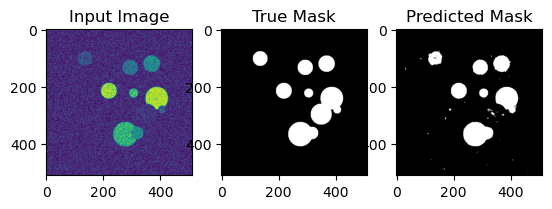

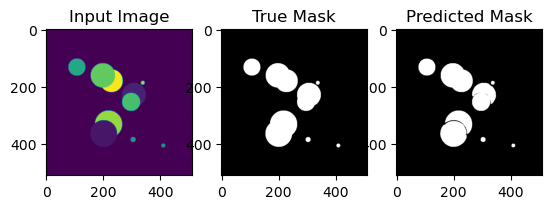

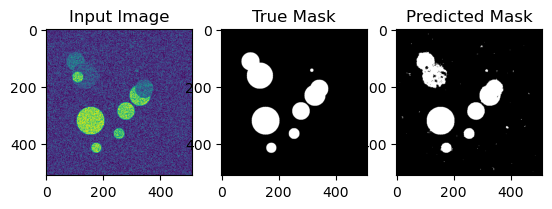

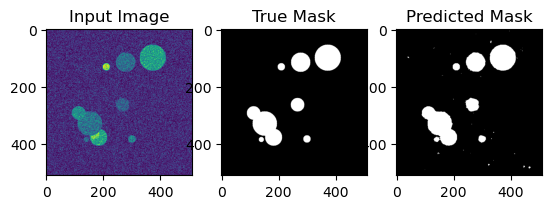

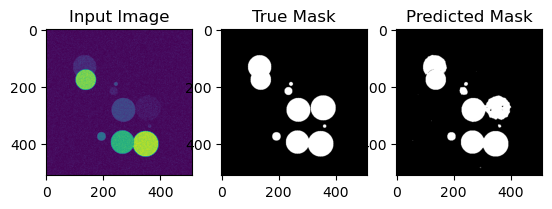

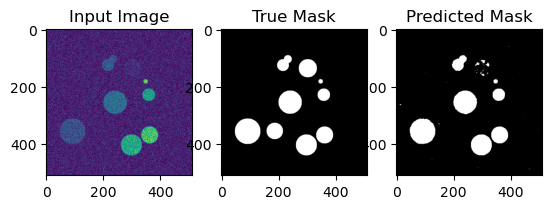

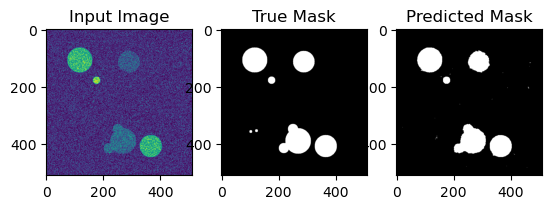

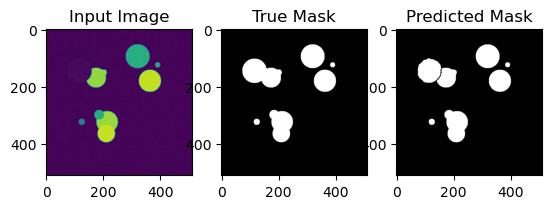

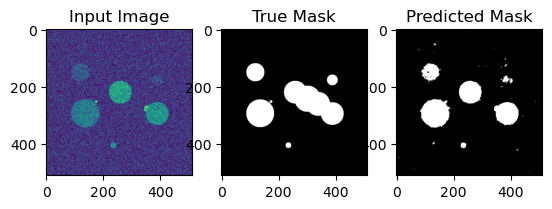

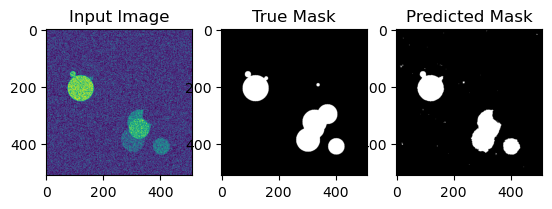

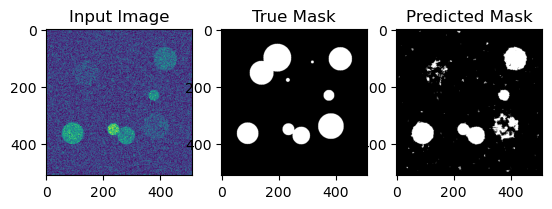

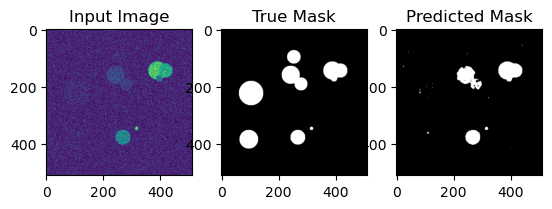

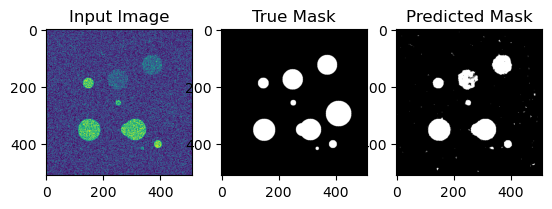

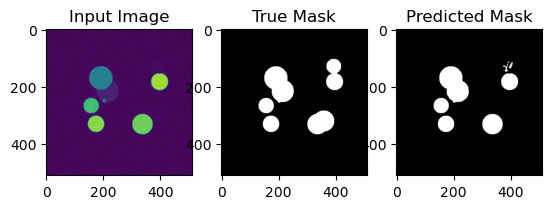

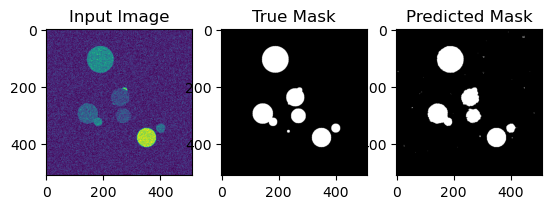

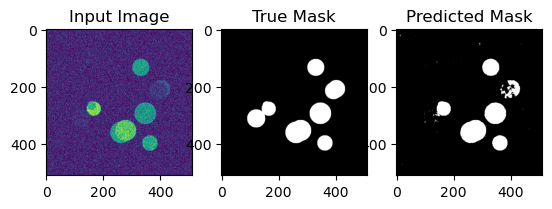

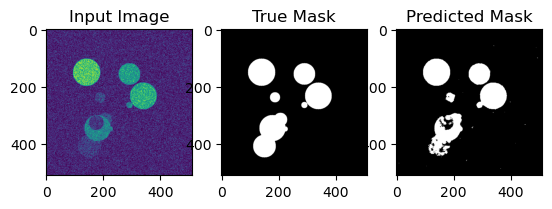

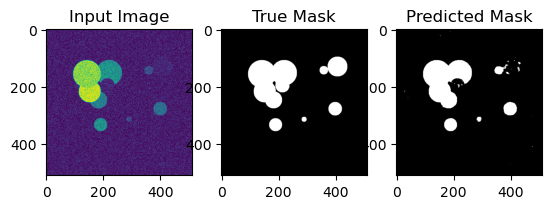

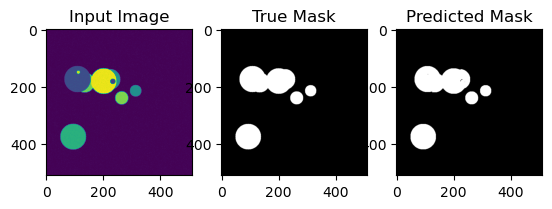

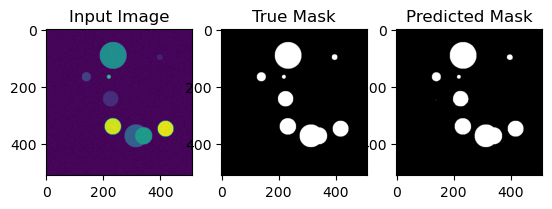

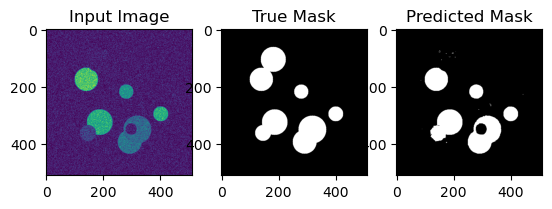

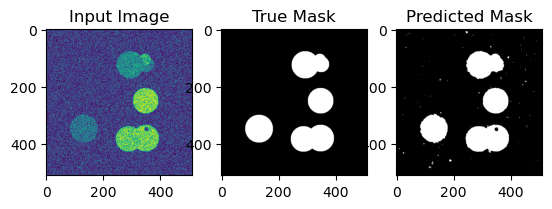

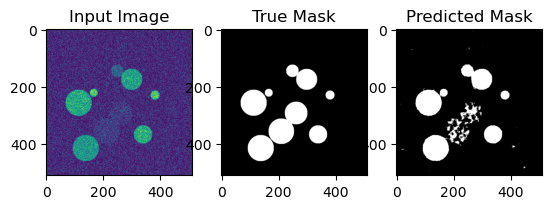

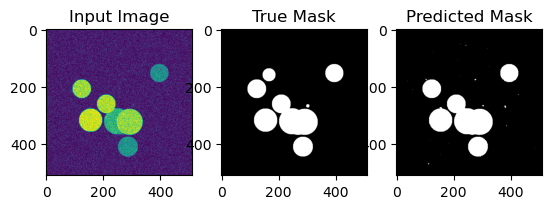

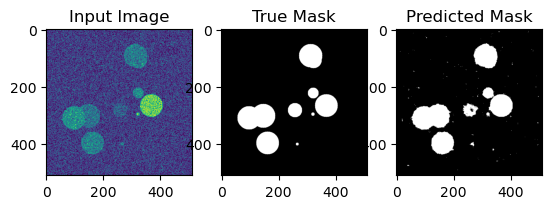

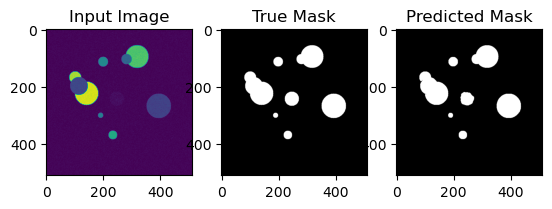

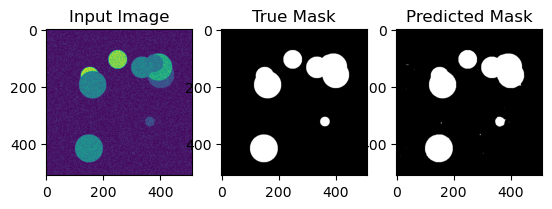

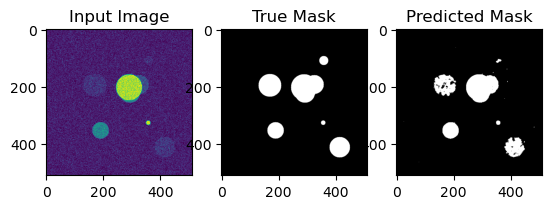

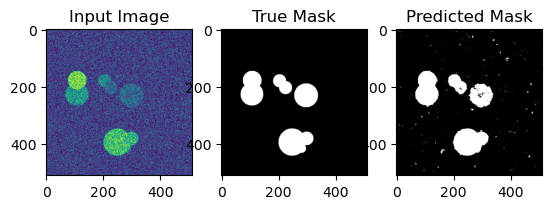

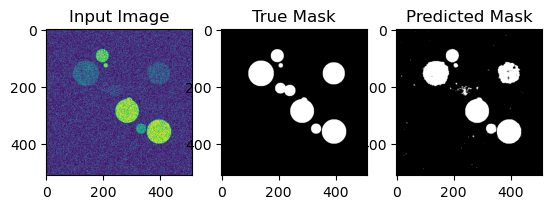

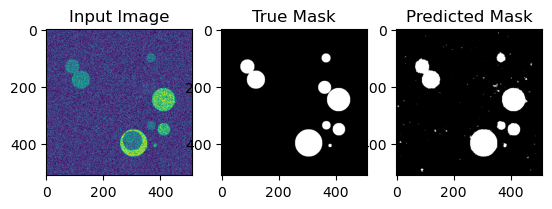

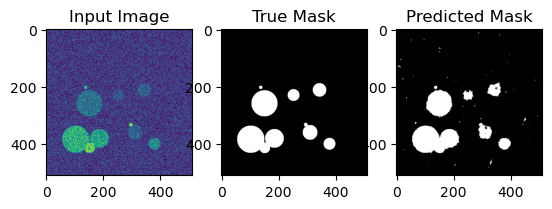

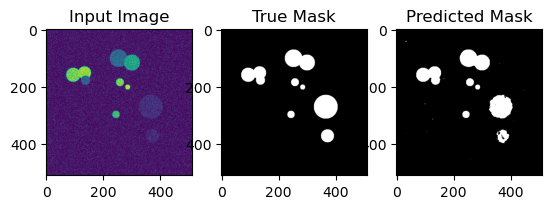

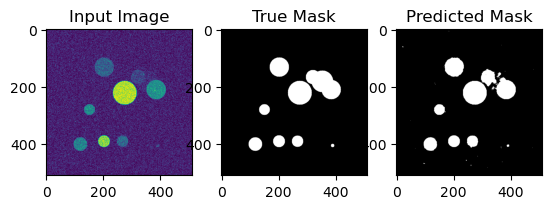

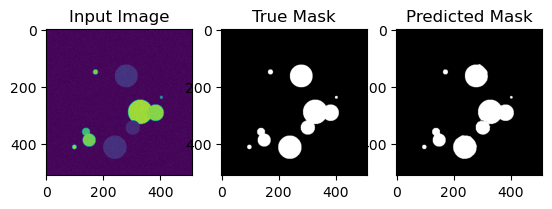

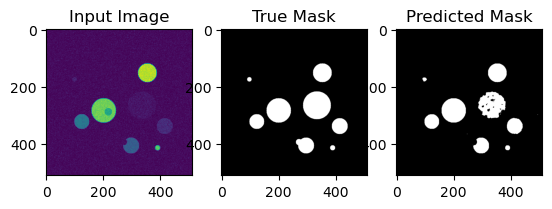

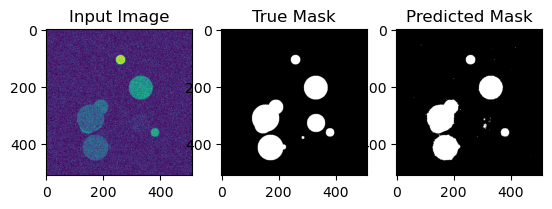

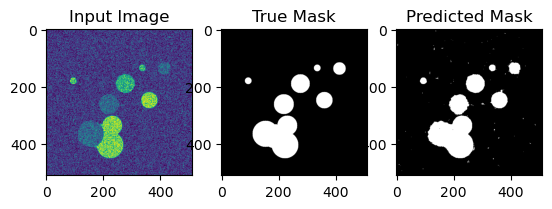

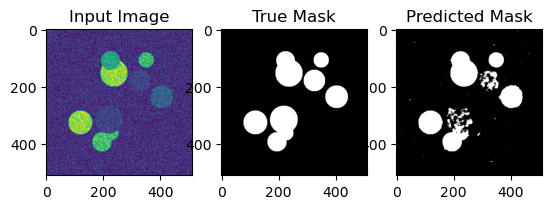

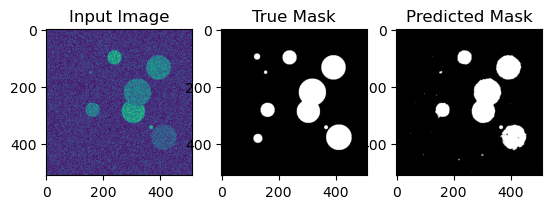

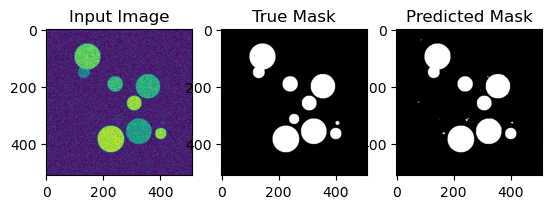

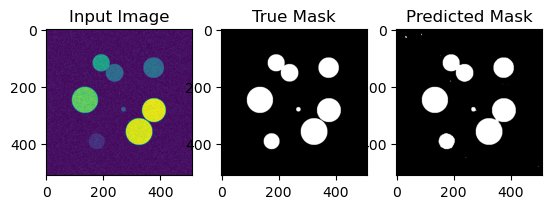

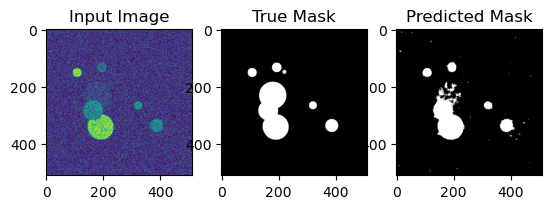

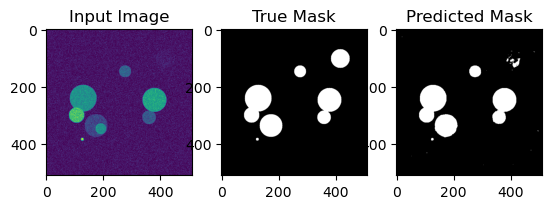

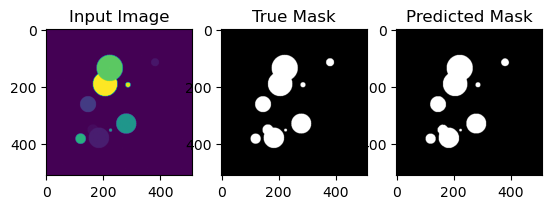

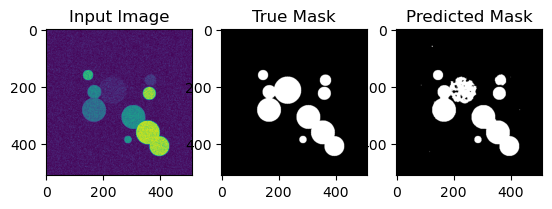

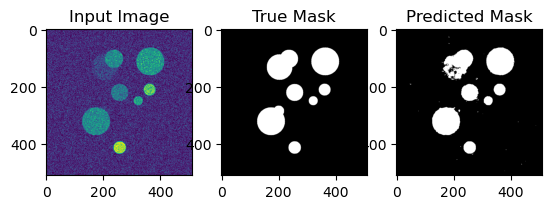

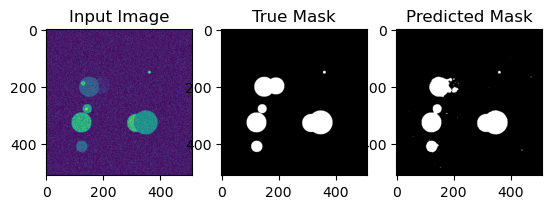

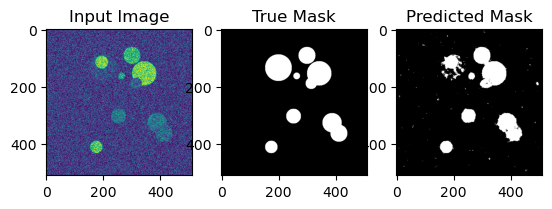

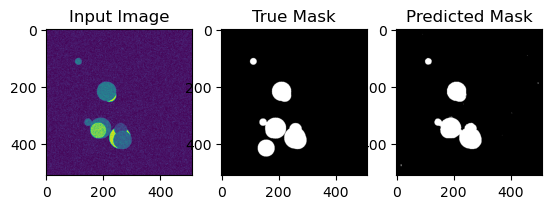

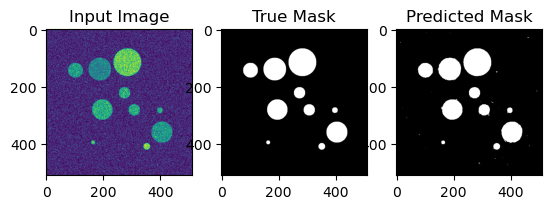

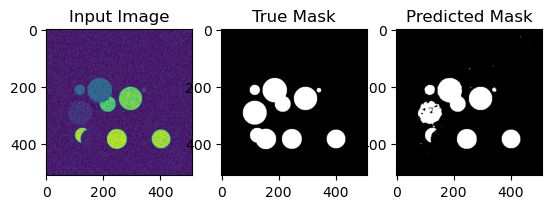

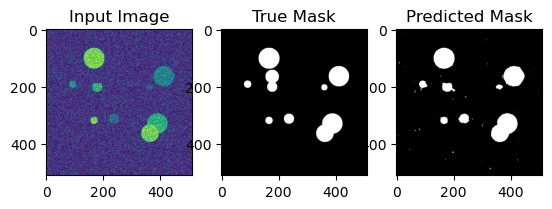

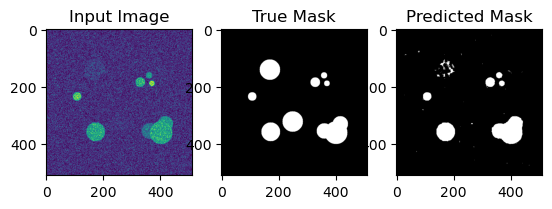

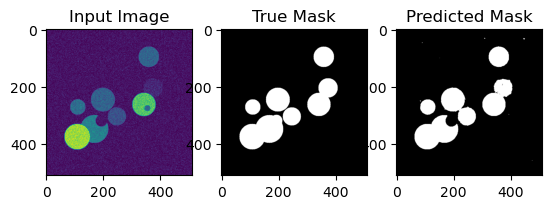

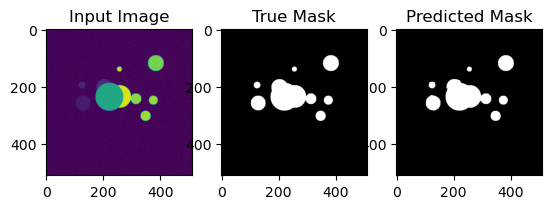

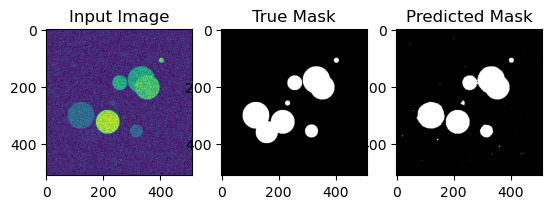

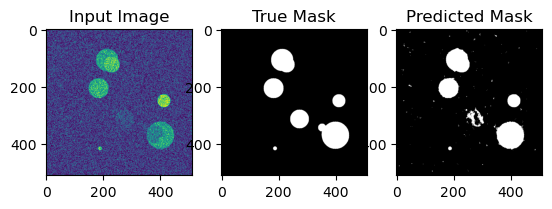

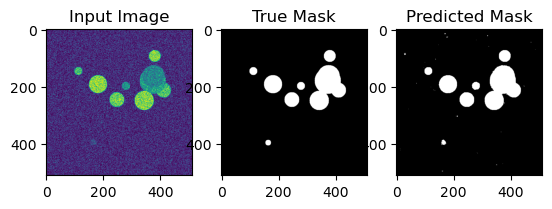

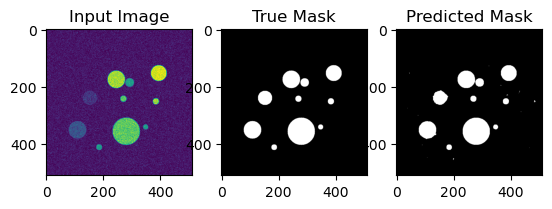

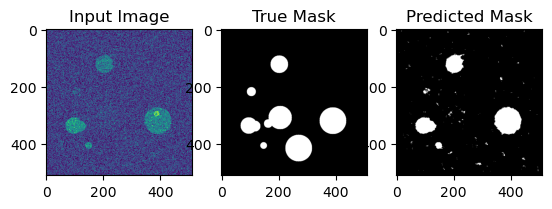

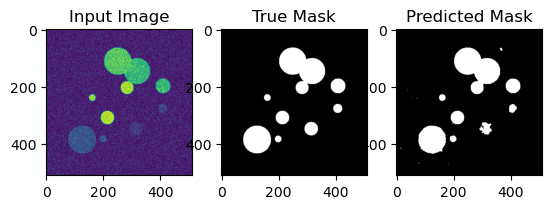

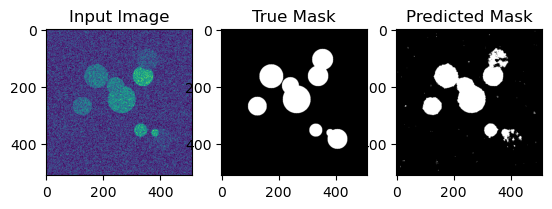

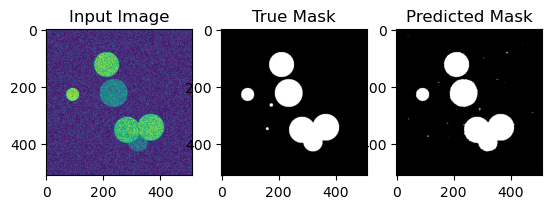

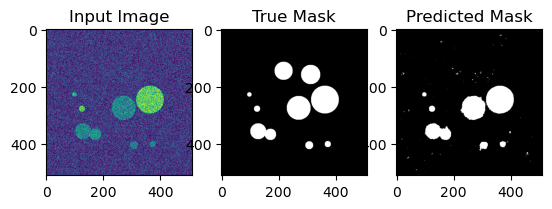

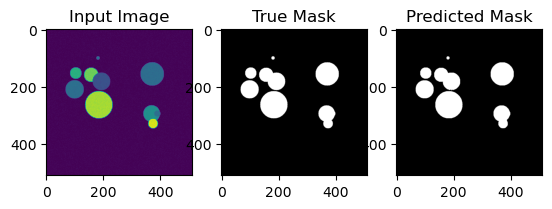

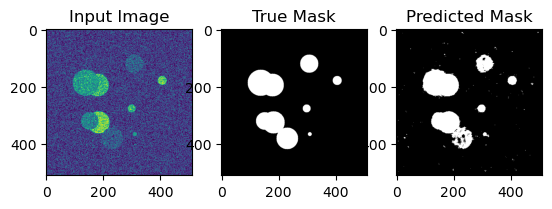

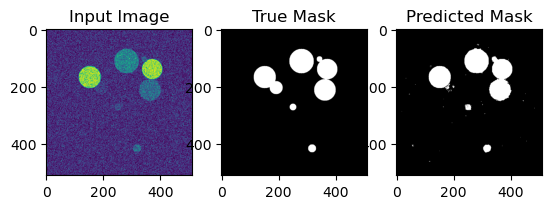

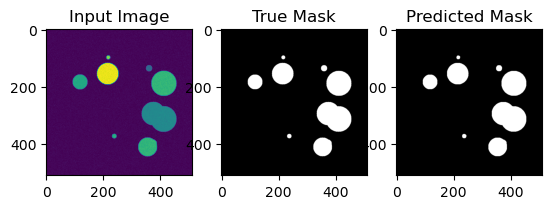

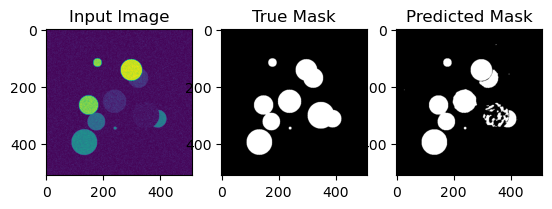

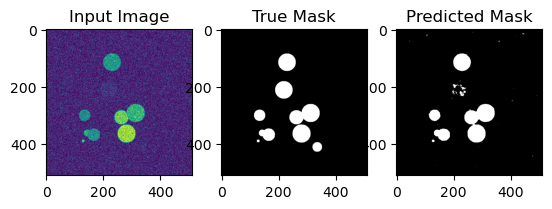

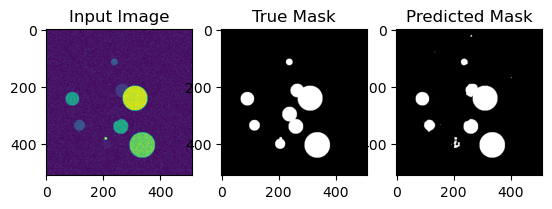

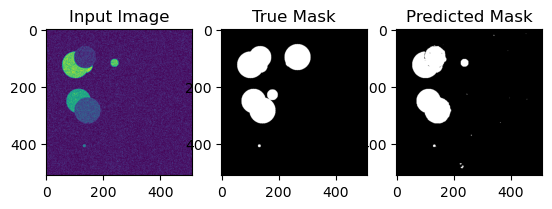

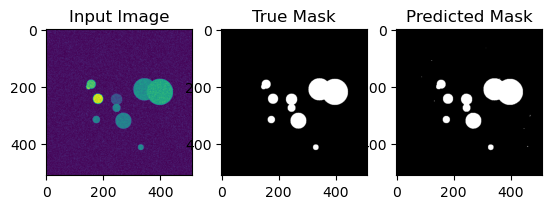

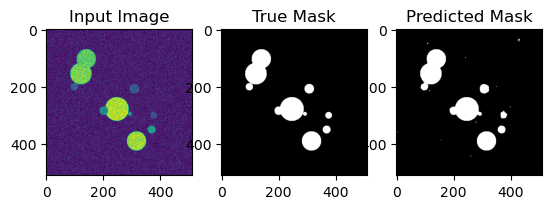

In [15]:
visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100)